In [24]:
%run './model/multi_corpus.py'
%run './model/ergm_functions.py'
%run './constants.py'



import multiprocessing as mp
import polars as pl
from itertools import combinations
# mp.set_start_method('forkserver')
import math

import networkx as nx

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import scipy as sp

from itertools import product
from scipy.special import comb
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import umap.umap_ as umap

from sklearn.preprocessing import StandardScaler

import os


from scipy.spatial.distance import cosine
from scipy.stats import norm

import pytensor.tensor as pt

from IPython.display import display

import seaborn as sns
sns.set(rc = {'figure.figsize': (15, 8)})

# RANDOM_SEED = 8927
# rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

# Co-Occurence

In [27]:
corpora = co_occurence_graphs(n_edges=100)
Gs = {field_name: corpus['G'] for (field_name, corpus) in corpora.items()}
Dfs = {field_name: corpus['Df'] for (field_name, corpus) in corpora.items()}

Gender Studies Graph with 57 nodes and 100 edges
Geometry Graph with 61 nodes and 100 edges
Geophysics Graph with 63 nodes and 100 edges
Economics Graph with 50 nodes and 100 edges
Language & Linguistics Graph with 58 nodes and 100 edges
Probability & Statistics Graph with 58 nodes and 100 edges
Material Engineering Graph with 49 nodes and 100 edges
Artificial Intelligence Graph with 49 nodes and 100 edges
Sociology Graph with 76 nodes and 100 edges
International Business Graph with 51 nodes and 100 edges
Political Science Graph with 56 nodes and 100 edges
Genetics & Genomics Graph with 71 nodes and 100 edges
Immunology Graph with 92 nodes and 100 edges
Human Resources & Organizations Graph with 66 nodes and 100 edges
Ethnic & Cultural Studies Graph with 52 nodes and 100 edges
Neurology Graph with 46 nodes and 100 edges


In [28]:
tables = []
dist = {}

for (field_name, d) in corpora.items():

    G = d['G']
    df = d['Df']

    print(field_name)

    observed = nx.to_numpy_array(G, weight=None)

    βs_xs = {
        'Density': delta_edges(G),
        # 'Triangles': delta_triangles(G),
        # 'Stars': delta_star(G, 3),
        # 'Betweenness': delta_betweenness(G),
        # 'Closeness': delta_closeness(G),
        # 'Eigenvector': delta_eigenvector(G),
        # 'Centralization': delta_centralization(G),
        # 'Clustering': delta_clustering(G),
        # 'Transitivity': delta_transitivity(G),
        # 'Cliques': delta_cliques(G),
        # 'Components': delta_components(G),
        # 'Gini': delta_g ini(G),
        # 'Louvain': delta_louvain(G),
        # 'Geodesic': delta_geodesic(G),
    }

    dist[field_name] = βs_xs

    with pm.Model() as model:

        βs = []
        xs = []
        for β_name, x in βs_xs.items():
            β = pm.Normal(β_name, sigma=1, initval=None)
            βs.append(β)
            xs.append(x)

        μ = sum(β * x for β, x in zip(βs, xs))

        likelihood = pm.math.sigmoid(μ)

        pm.Bernoulli(name='logit', p=likelihood, observed=observed)

        trace = pm.sample(
            tune=1000,
            draws=2000,
            chains=4,
            # init = 'adapt_diag',
            cores=4,
            # step=pm.Metropolis(),
            step=pm.NUTS(),
            # random_seed=12345,
        )

        trace.to_netcdf(os.path.join(os.path.join(OUTPUT_PATH, f'co_occurence_traces'), f'{field_name}.nc'))


Gender Studies


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 244 seconds.


Geometry


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 159 seconds.


Geophysics


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 95 seconds.


Economics


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 138 seconds.


Language & Linguistics


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 275 seconds.


Probability & Statistics


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 122 seconds.


Material Engineering


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 767 seconds.


Artificial Intelligence


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2023 seconds.


Sociology


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 140 seconds.


International Business


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 110 seconds.


Political Science


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 86 seconds.


Genetics & Genomics


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 138 seconds.


Immunology


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 138 seconds.


Human Resources & Organizations


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 86 seconds.


Ethnic & Cultural Studies


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 125 seconds.


Neurology


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]
NUTS: [Density, Triangles, Stars, Betweenness, Cliques, Components, Louvain, Geodesic]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 66 seconds.


# Table

In [4]:
def p_value_stars(p_value):
    match p_value:
        case _ if p_value <= 0.001:
            stars = '***'
        case _ if p_value <= 0.01:
            stars =  '**'
        case _ if p_value <= 0.05:
            stars =  '*'  
        case _:
            stars = ' '
    return stars

In [5]:
traces_path = os.path.join(OUTPUT_PATH, f'co_occurence_traces')

co_citation_coef = []
co_citation_se = []

for file in os.listdir(traces_path):

    field_name = file.split('.')[0]
    trace = az.from_netcdf(os.path.join(traces_path, file))

    summary = az.summary(trace, kind="stats")
    summary.index.name = 'beta'
    df = pl.from_pandas(summary, include_index=True)
    df = df.with_columns(pl.col('beta').str.replace('_', ' '))

    df = (
        df
        .with_columns((pl.col('mean') / pl.col('sd')).round(4).alias('z_score'))
        .with_columns((pl.col('z_score').abs().apply(norm.sf).round(4).alias('p_value')))
        .with_columns(pl.col('p_value').apply(p_value_stars).alias('significance'))
    )

    df_coef = (
        df.select(
            pl.col('beta'),
            pl.concat_str(
                [
                    pl.col('mean'),
                    pl.col('significance')
                ],
                # sep=''
            ).alias(field_name),
        )
    )

    df_se = (
        df.select(
            pl.col('beta'),
            pl.concat_str(
                [
                    pl.lit('('),
                    pl.col('sd'),
                    pl.lit(')'),
                ]
            ).alias(field_name),
        )
    )

    co_citation_coef.append(df_coef)
    co_citation_se.append(df_se)

iter_dfs = iter(co_citation_coef)
co_citation_df_coef = next(iter_dfs)
for df in iter_dfs:
    co_citation_df_coef = co_citation_df_coef.join(df, on='beta', how='inner')

iter_dfs = iter(co_citation_se)
co_citation_df_se = next(iter_dfs)
for df in iter_dfs:
    co_citation_df_se = co_citation_df_se.join(df, on='beta', how='inner')

columns = sorted(co_citation_df_coef.select(pl.all().exclude('beta')).columns)

In [6]:
coef_df = co_citation_df_coef.select(pl.concat_str(pl.all(), sep=' & ').alias('all_fields'))
se_df = co_citation_df_se.select(pl.concat_str(pl.all().exclude('beta').alias('all_fields'), sep=' & '))

coef_df = coef_df['all_fields'].to_list()
se_df = se_df['all_fields'].to_list()

row_str = ''
for i in range(len(se_df)):
    row_str += f'{coef_df[i]} \\\ \n & {se_df[i]} \\\ \n \\addlinespace[0.5em] \n'

alignments = ''.join(['c']*len(columns)*2)

new_columns = []
for col in columns:
    if ' & ' in col:
        first, second = col.split(' & ')
        s = f'\\begin{{tabular}}{{cc}} {first} \& \\\ {second} \\end{{tabular}}'
        new_columns.append(s)
    elif ' ' in col:
        first, second = col.split(' ')
        s = f'\\begin{{tabular}}{{cc}} {first} \\\ {second} \\end{{tabular}}'
        new_columns.append(s)
    else:
        s = f'\\begin{{tabular}}{{cc}} {col} \\end{{tabular}}'
        new_columns.append(s)
new_columns = ' \n& '.join(new_columns)


table_str = f"""
\\begin{{tabular}}{{l*{{{len(columns)*2}}}{{c}}}}
\\toprule
\\addlinespace[0.7em]
& {new_columns} \\\ 
\\midrule
\\midrule
\\addlinespace[0.5em]
{row_str}
\\bottomrule
\end{{tabular}}
"""

with open(os.path.join(LATEX_TABLE_PATH, 'co_occurrence_ergm_model.tex'), "w+") as file:
    file.write(table_str)

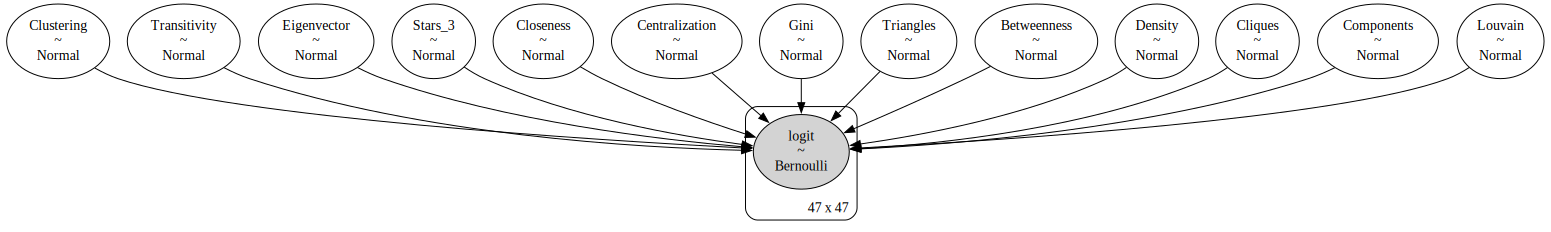

In [ ]:
pm.model_to_graphviz(model)

In [9]:
dfs = []

for field_name, features in dist.items():
    df = pl.DataFrame()
    for feature_name, mat in features.items():
        df = df.with_columns(
            pl.Series(
                feature_name,
                mat.reshape(np.multiply(*mat.shape))
            )
        )
    df = df.with_columns(
        pl.Series(
            'Field',
            np.full((len(df)), field_name)
        )
    )
    dfs.append(df)
df = pl.concat(dfs)

# Univariate

[]

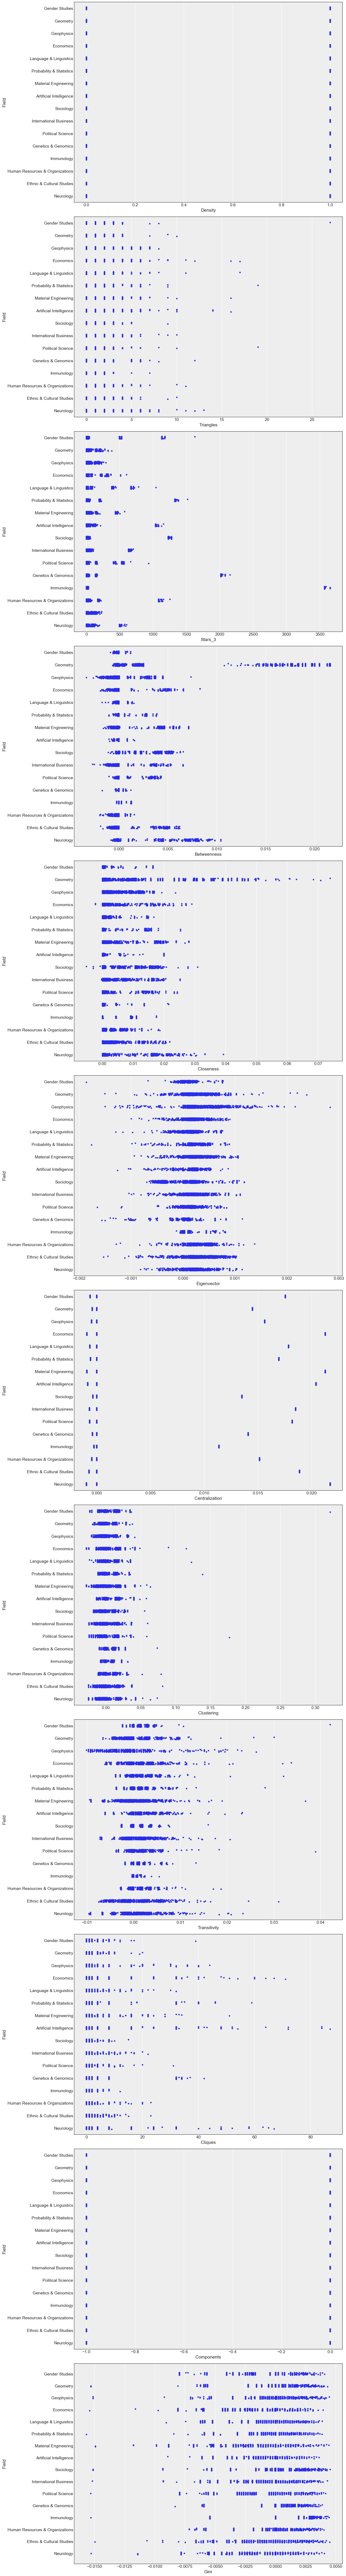

In [10]:
cols = df.select(pl.all().exclude('Field')).columns
n_cols = len(cols)

fig, axs = plt.subplots(n_cols, figsize=(16, 10*n_cols))
for col, ax in zip(cols, axs):
    sns.stripplot(data=df.to_pandas(), x=col, y="Field", ax=ax)
    ax.spines['top'].set_color('k')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['right'].set_color('k')
    ax.spines['right'].set_linewidth(1)
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(1)

plt.plot()

# BiVariate

In [11]:
df.to_pandas().corr()

Density  Triangles   Stars_3  Betweenness  Closeness  \
Density         1.000000   0.517372  0.133678     0.150251   0.284081   
Triangles       0.517372   1.000000  0.139476    -0.088474  -0.078780   
Stars_3         0.133678   0.139476  1.000000    -0.004310   0.210740   
Betweenness     0.150251  -0.088474 -0.004310     1.000000   0.779666   
Closeness       0.284081  -0.078780  0.210740     0.779666   1.000000   
Eigenvector     0.427357  -0.093816  0.204037     0.150354   0.401190   
Centralization  0.002510   0.097584  0.624760    -0.011383   0.202704   
Clustering      0.365133   0.470999  0.036899    -0.096508  -0.142762   
Transitivity    0.205225   0.799016 -0.051562    -0.123655  -0.276982   
Cliques         0.418531   0.852575  0.149740    -0.011563   0.033948   
Components     -0.256252   0.128420 -0.213508    -0.662468  -0.824929   
Gini           -0.411977   0.103599 -0.059124    -0.106676  -0.188373   

                Eigenvector  Centralization  Clustering  Transitivity  \
Density            0.427357        0.002510    0.365133      0.205225   
Triangles         -0.093816        0.097584    0.470999      0.799016   
Stars_3            0.204037        0.624760    0.036899     -0.051562   
Betweenness        0.150354       -0.011383   -0.096508     -0.123655   
Closeness          0.401190        0.202704   -0.142762     -0.276982   
Eigenvector        1.000000        0.185917    0.020545     -0.409575   
Centralization     0.185917        1.000000    0.025568     -0.186818   
Clustering         0.020545        0.025568    1.000000      0.384607   
Transitivity      -0.409575       -0.186818    0.384607      1.000000   
Cliques           -0.117451        0.109233    0.244129      0.654668   
Components        -0.273341       -0.139612    0.154024      0.242465   
Gini              -0.337125        0.065557   -0.104288      0.094800   

                 Cliques  Components      Gini  
Density         0.418531   -0.256252 -0.411977  
Triangles       0.852575    0.128420  0.103599  
Stars_3         0.149740   -0.213508 -0.059124  
Betweenness    -0.011563   -0.662468 -0.106676  
Closeness       0.033948   -0.824929 -0.188373  
Eigenvector    -0.117451   -0.273341 -0.337125  
Centralization  0.109233   -0.139612  0.065557  
Clustering      0.244129    0.154024 -0.104288  
Transitivity    0.654668    0.242465  0.094800  
Cliques         1.000000    0.005827  0.045280  
Components      0.005827    1.000000  0.262129  
Gini            0.045280    0.262129  1.000000

/Users/vladimirborel/Documents/GitHub/dissertation/corpus/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/vladimirborel/Documents/GitHub/dissertation/corpus/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:208: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  self._figure.subplots_adjust(right=right)
/Users/vladimirborel/Documents/GitHub/dissertation/corpus/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


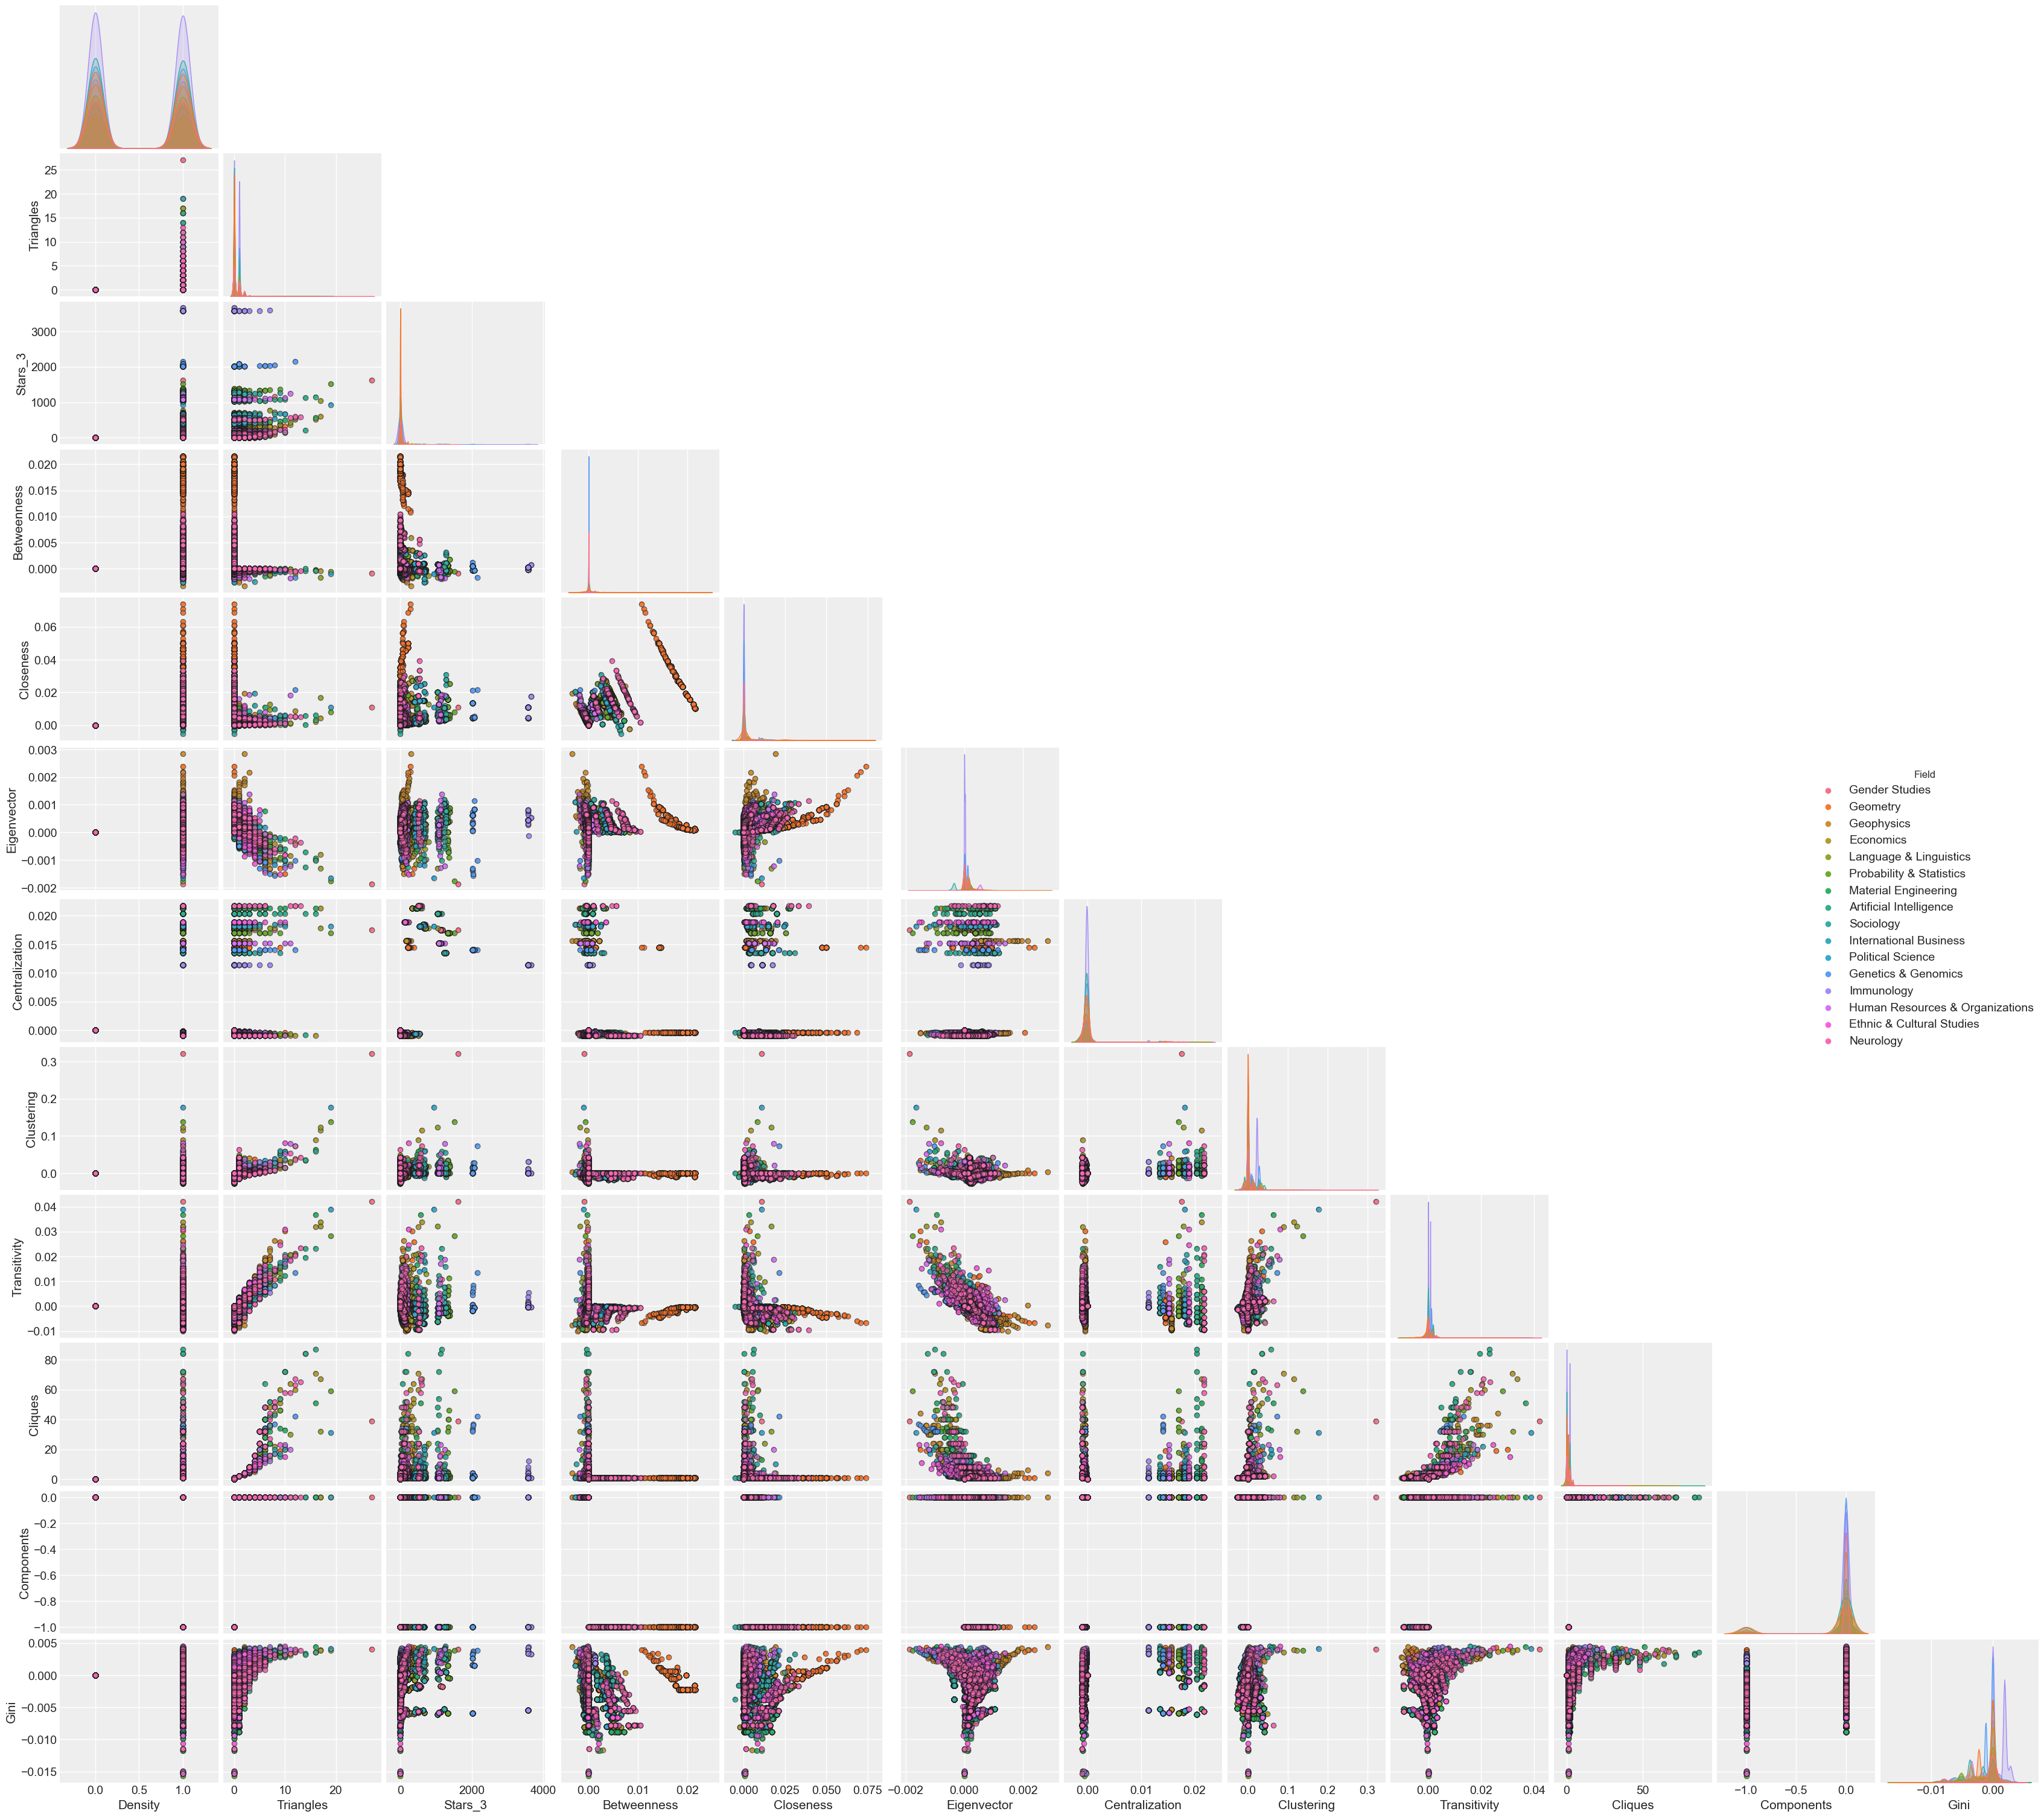

In [12]:
# sns.set(rc={'figure.figsize':(16, 12)})
# sns.set_style('darkgrid', {'axes.linewidth': 1, 'axes.edgecolor': 'black', 'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.spines.right': True, 'axes.spines.top': True})

pp = sns.pairplot(df.to_pandas(), vars=None, hue='Field', corner=True, grid_kws={'layout_pad': 0.5}) # , corner=True , grid_kws={"despine": False}

pp.map_lower(plt.scatter, alpha = 0.6, linewidth=1, edgecolor='k')
# g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
# pp.map_diag(plt.kdeplot, alpha=1)
# pp.map_lower(sns.scatterplot)
pp.map_upper(sns.kdeplot, shade=True)

# for ax in pp.axes.flat:
#     if ax:
#         ax.spines['top'].set_color('k')
#         ax.spines['top'].set_linewidth(1)
#         ax.spines['bottom'].set_color('k')
#         ax.spines['bottom'].set_linewidth(1)
#         ax.spines['right'].set_color('k')
#         ax.spines['right'].set_linewidth(1)
#         ax.spines['left'].set_color('k')
#         ax.spines['left'].set_linewidth(1)

plt.show()

/Users/vladimirborel/Documents/GitHub/dissertation/corpus/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1760: UserWarning: The figure layout has changed to tight
  f.tight_layout()
/Users/vladimirborel/Documents/GitHub/dissertation/corpus/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1761: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  f.subplots_adjust(hspace=space, wspace=space)
/Users/vladimirborel/Documents/GitHub/dissertation/corpus/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


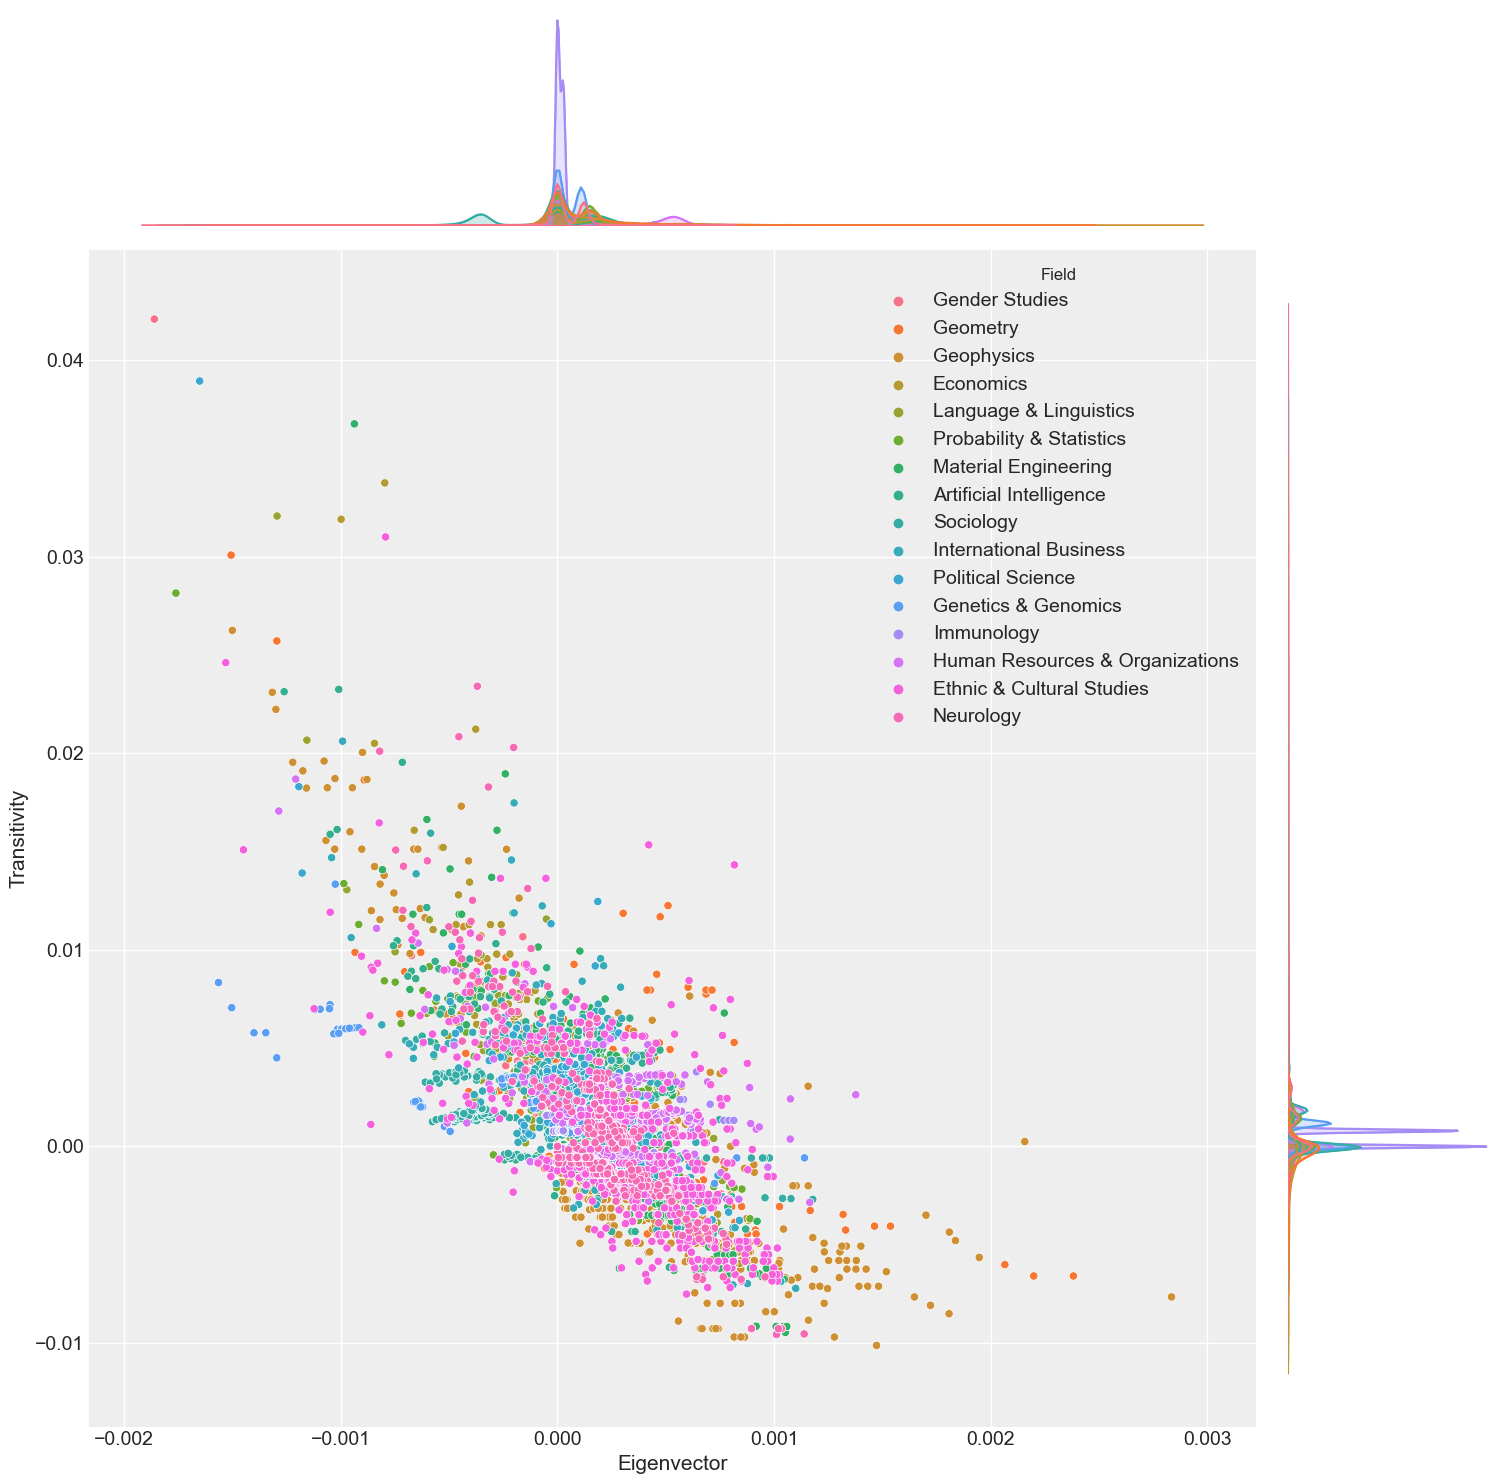

In [15]:
# sns.set_style('darkgrid', {'axes.linewidth': 1, 'axes.edgecolor':'black'})

jp = sns.jointplot(data=df, x="Eigenvector", y="Transitivity", hue="Field", height=15, space=0)
jp.plot_marginals(sns.kdeplot)

jp.ax_marg_x.set_facecolor('w')
jp.ax_marg_y.set_facecolor('w')

ax.spines['top'].set_color('k')
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_color('k')
ax.spines['bottom'].set_linewidth(1)
ax.spines['right'].set_color('k')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('k')
ax.spines['left'].set_linewidth(1)

plt.show()

# Embeddings

In [2]:
traces_path = os.path.join(OUTPUT_PATH, f'co_occurence_traces')

co_occurence_coef = []
co_occurence_se = []

for file in os.listdir(traces_path):

    field_name = file.split('.')[0]
    trace = az.from_netcdf(os.path.join(traces_path, file))

    summary = az.summary(trace, kind="stats")
    summary.index.name = 'beta'
    df = pl.from_pandas(summary, include_index=True)
    df = df.with_columns(pl.col('beta').str.replace('_', ' '))

    df = (
        df
        .with_columns((pl.col('mean') / pl.col('sd')).round(4).alias('z_score'))
        .with_columns((pl.col('z_score').abs().apply(norm.sf).round(4).alias('p_value')))
    )

    df_coef = (
        df.select(
            pl.col('beta'),
            pl.when(pl.col('p_value') > 0.05).then(0).otherwise(pl.col('mean')).alias(field_name)
        )
    )

    co_occurence_coef.append(df_coef)

iter_dfs = iter(co_occurence_coef)
co_occurence_df_coef = next(iter_dfs)
for df in iter_dfs:
    co_occurence_df_coef = co_occurence_df_coef.join(df, on='beta', how='inner')

columns = co_occurence_df_coef['beta'].to_list()
vec_df = co_occurence_df_coef.select(pl.all().exclude('beta')).transpose(include_header=True, header_name='Field', column_names=columns)
field_names = vec_df['Field'].to_list()
vecs = vec_df.select(pl.all().exclude('Field')).to_numpy()

scaled_data = StandardScaler().fit_transform(vecs)

[]

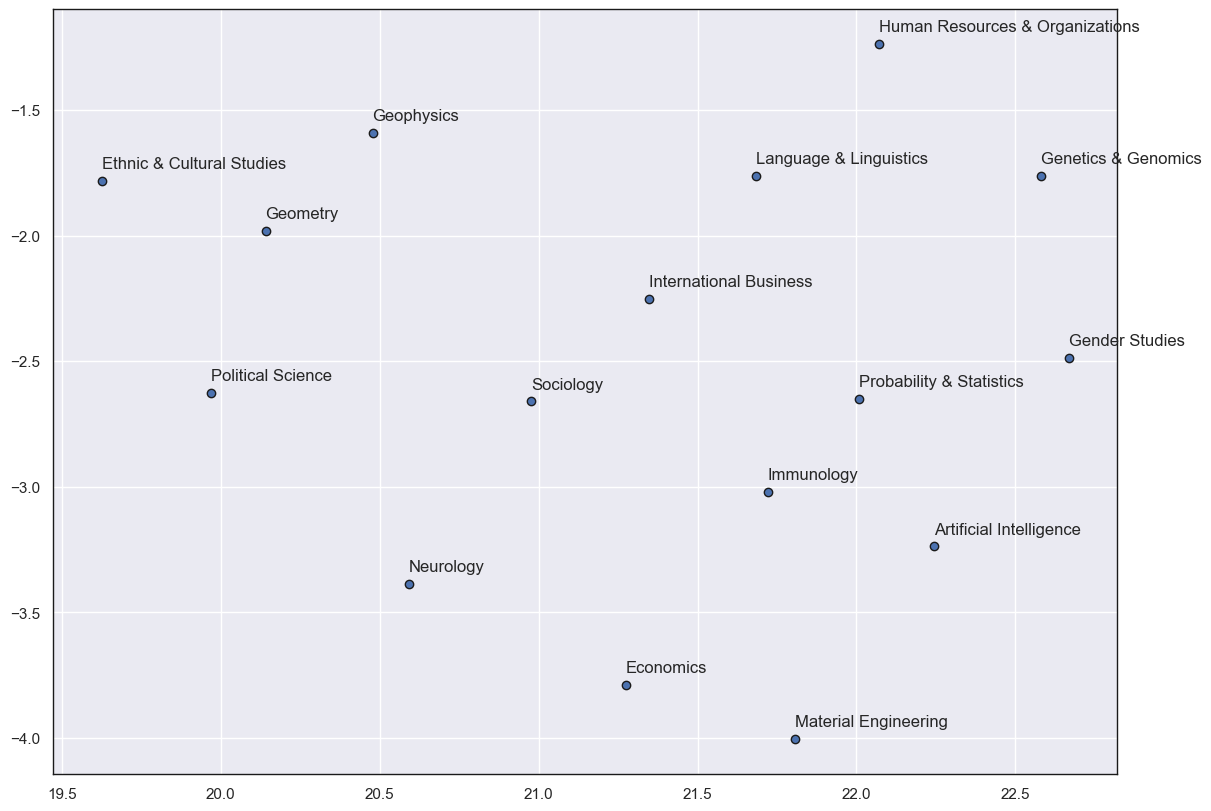

In [3]:



reducer = umap.UMAP(random_state=42)
embs = reducer.fit_transform(scaled_data)

sns.set()

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

plt.scatter(embs[:, 0], embs[:, 1], alpha=1, edgecolor='k')

# ax.set_title(f'{field_name.capitalize()}', fontweight='semibold', fontsize=20)

for field_name, (x, y) in zip(field_names, embs):
    plt.text(x, y+0.05, field_name)


ax.spines['top'].set_color('k')
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_color('k')
ax.spines['bottom'].set_linewidth(1)
ax.spines['right'].set_color('k')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('k')
ax.spines['left'].set_linewidth(1)

# fig.tight_layout()
# plt.savefig(f'{OBSIDIAN_IMG_PATH}/co_citation_umap_node2vec.png')
plt.plot()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/arviz/plots/backends/matplotlib/traceplot.py:214: UserWarning: A valid var_name should be provided, found {'C'} expected from {'Cliques', 'Triangles', 'Stars_3', 'Betweenness_centrality', 'Centralization', 'Closeness_centrality', 'Transitivity', 'Eigenvector_centrality', 'Components', 'Gini', 'Density', 'Clustering'}
  warnings.warn(


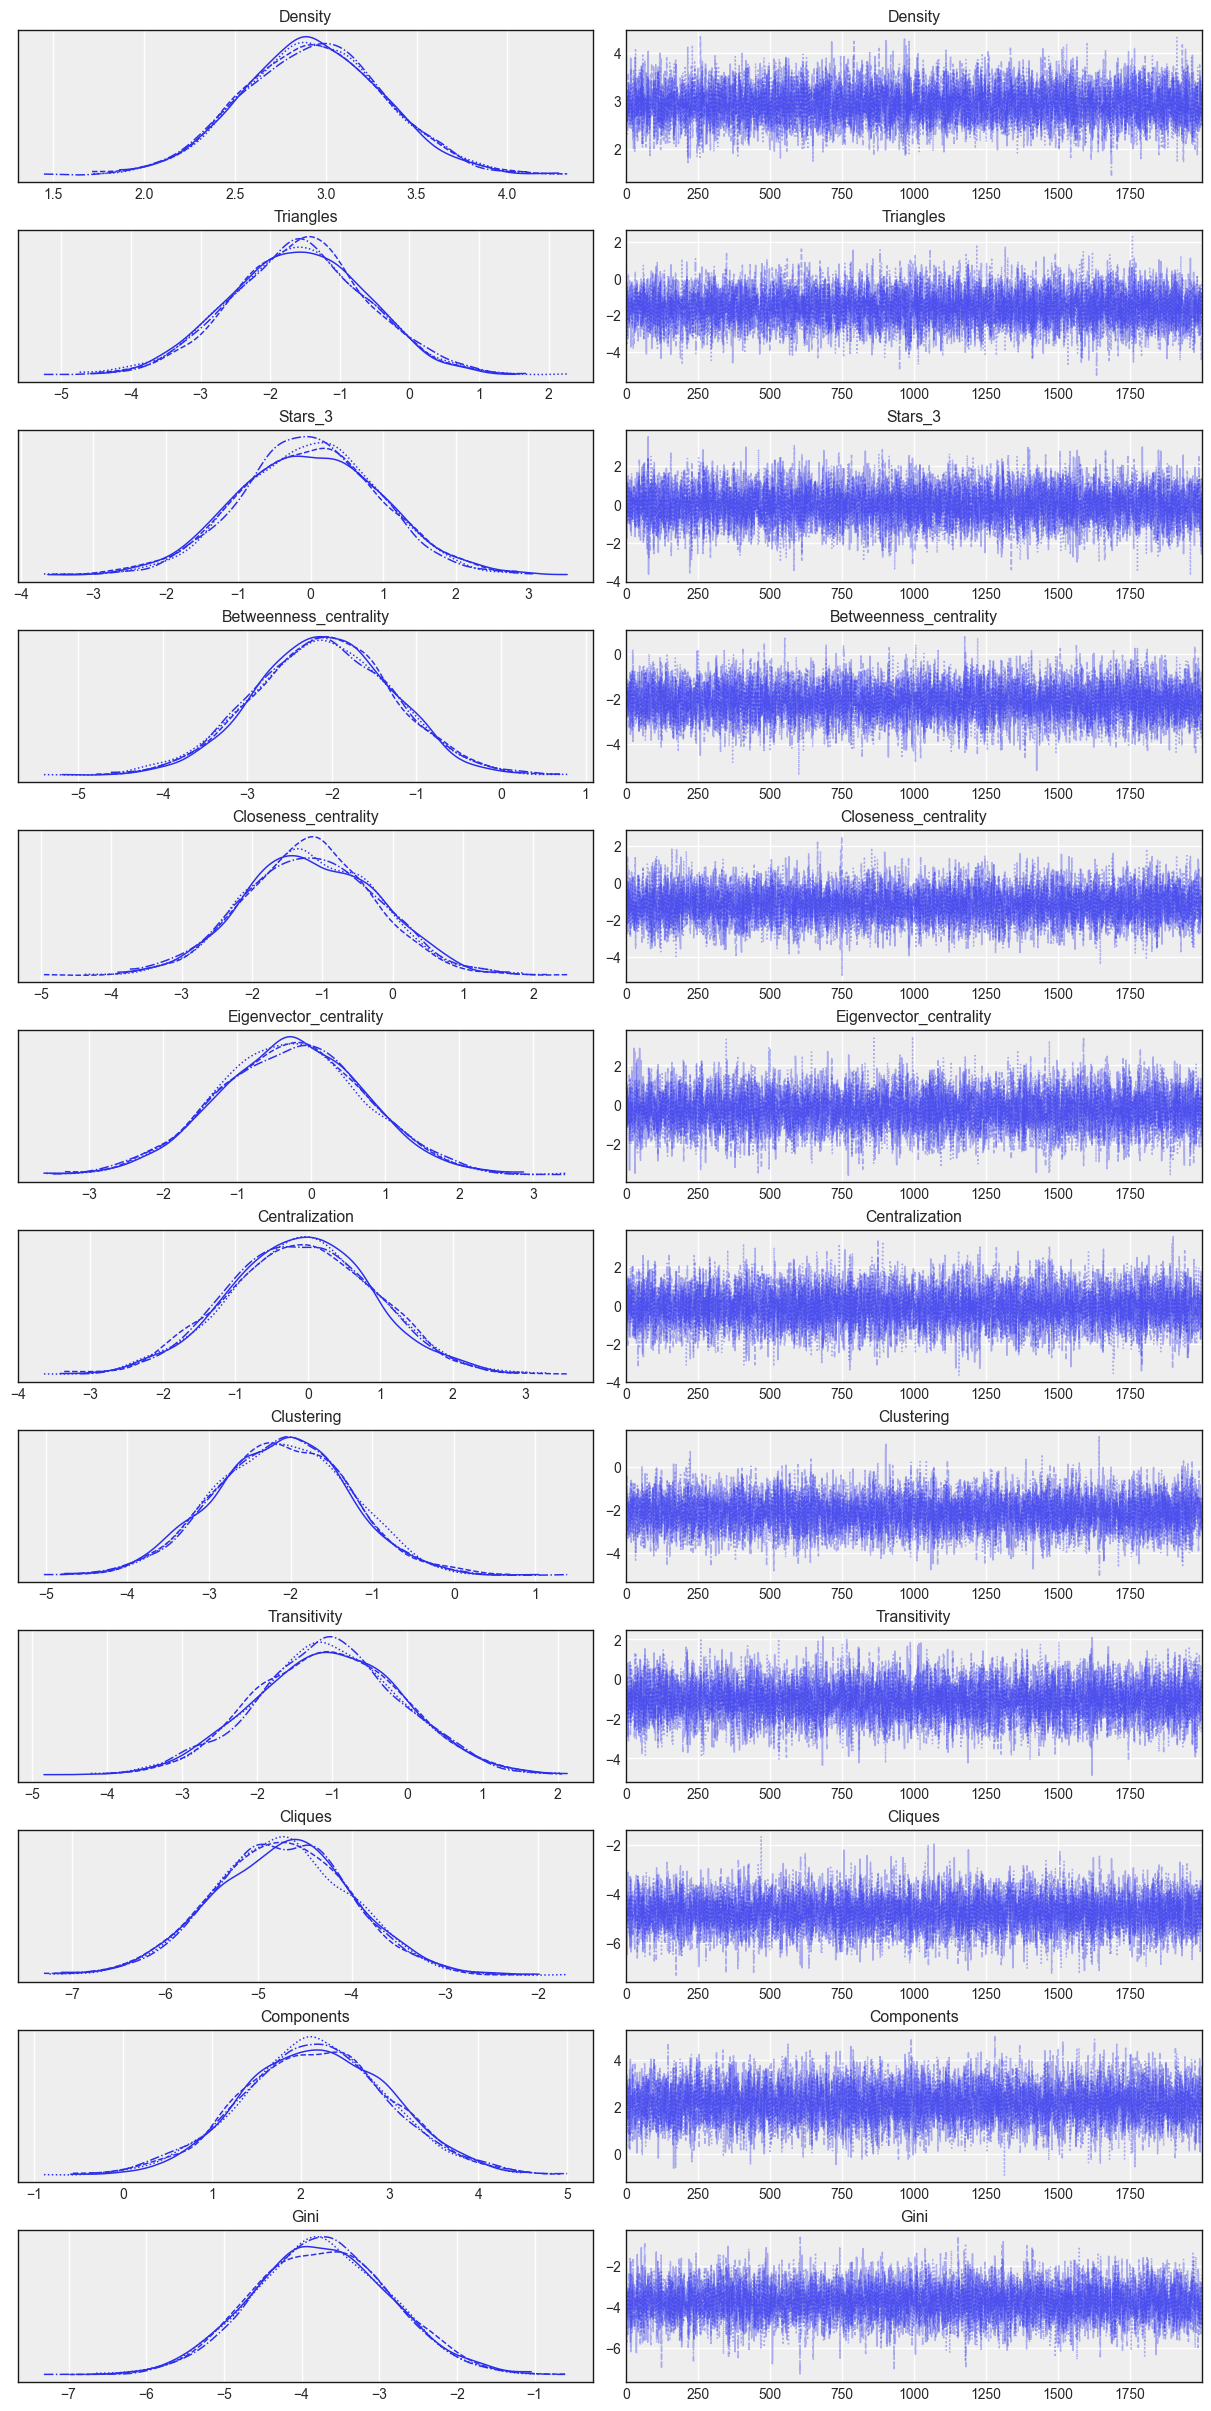

In [99]:
axes_arr = az.plot_trace(trace, divergences=None, lines={'Centralization': 2})
for ax in axes_arr.flatten():
    ax.spines['top'].set_color('k')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['right'].set_color('k')
    ax.spines['right'].set_linewidth(1)
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(1)
plt.draw()

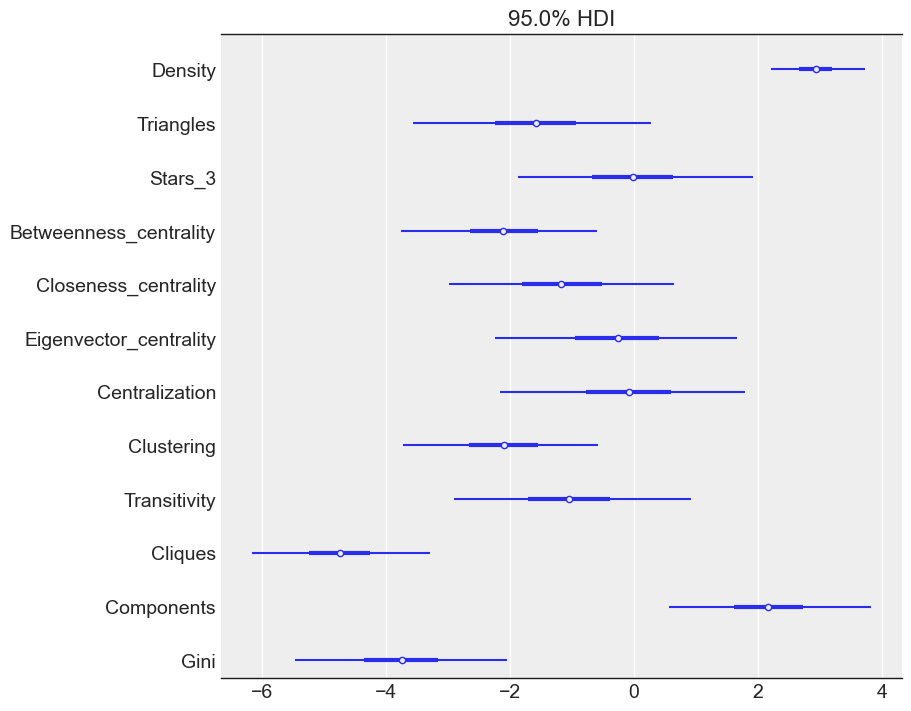

In [100]:
axes_arr = az.plot_forest(trace, combined=True, hdi_prob=0.95, r_hat=False, figsize=(9, 7))
for ax in axes_arr.flatten():
    ax.spines['top'].set_color('k')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['right'].set_color('k')
    ax.spines['right'].set_linewidth(1)
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(1)
plt.show()

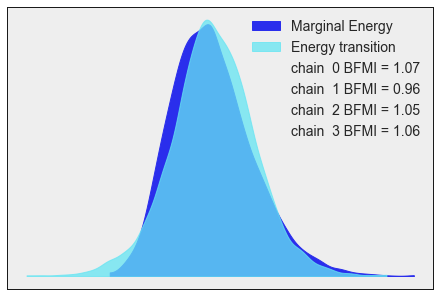

In [28]:
ax = az.plot_energy(trace)
ax.spines['top'].set_color('k')
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_color('k')
ax.spines['bottom'].set_linewidth(1)
ax.spines['right'].set_color('k')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('k')
ax.spines['left'].set_linewidth(1)
plt.draw()

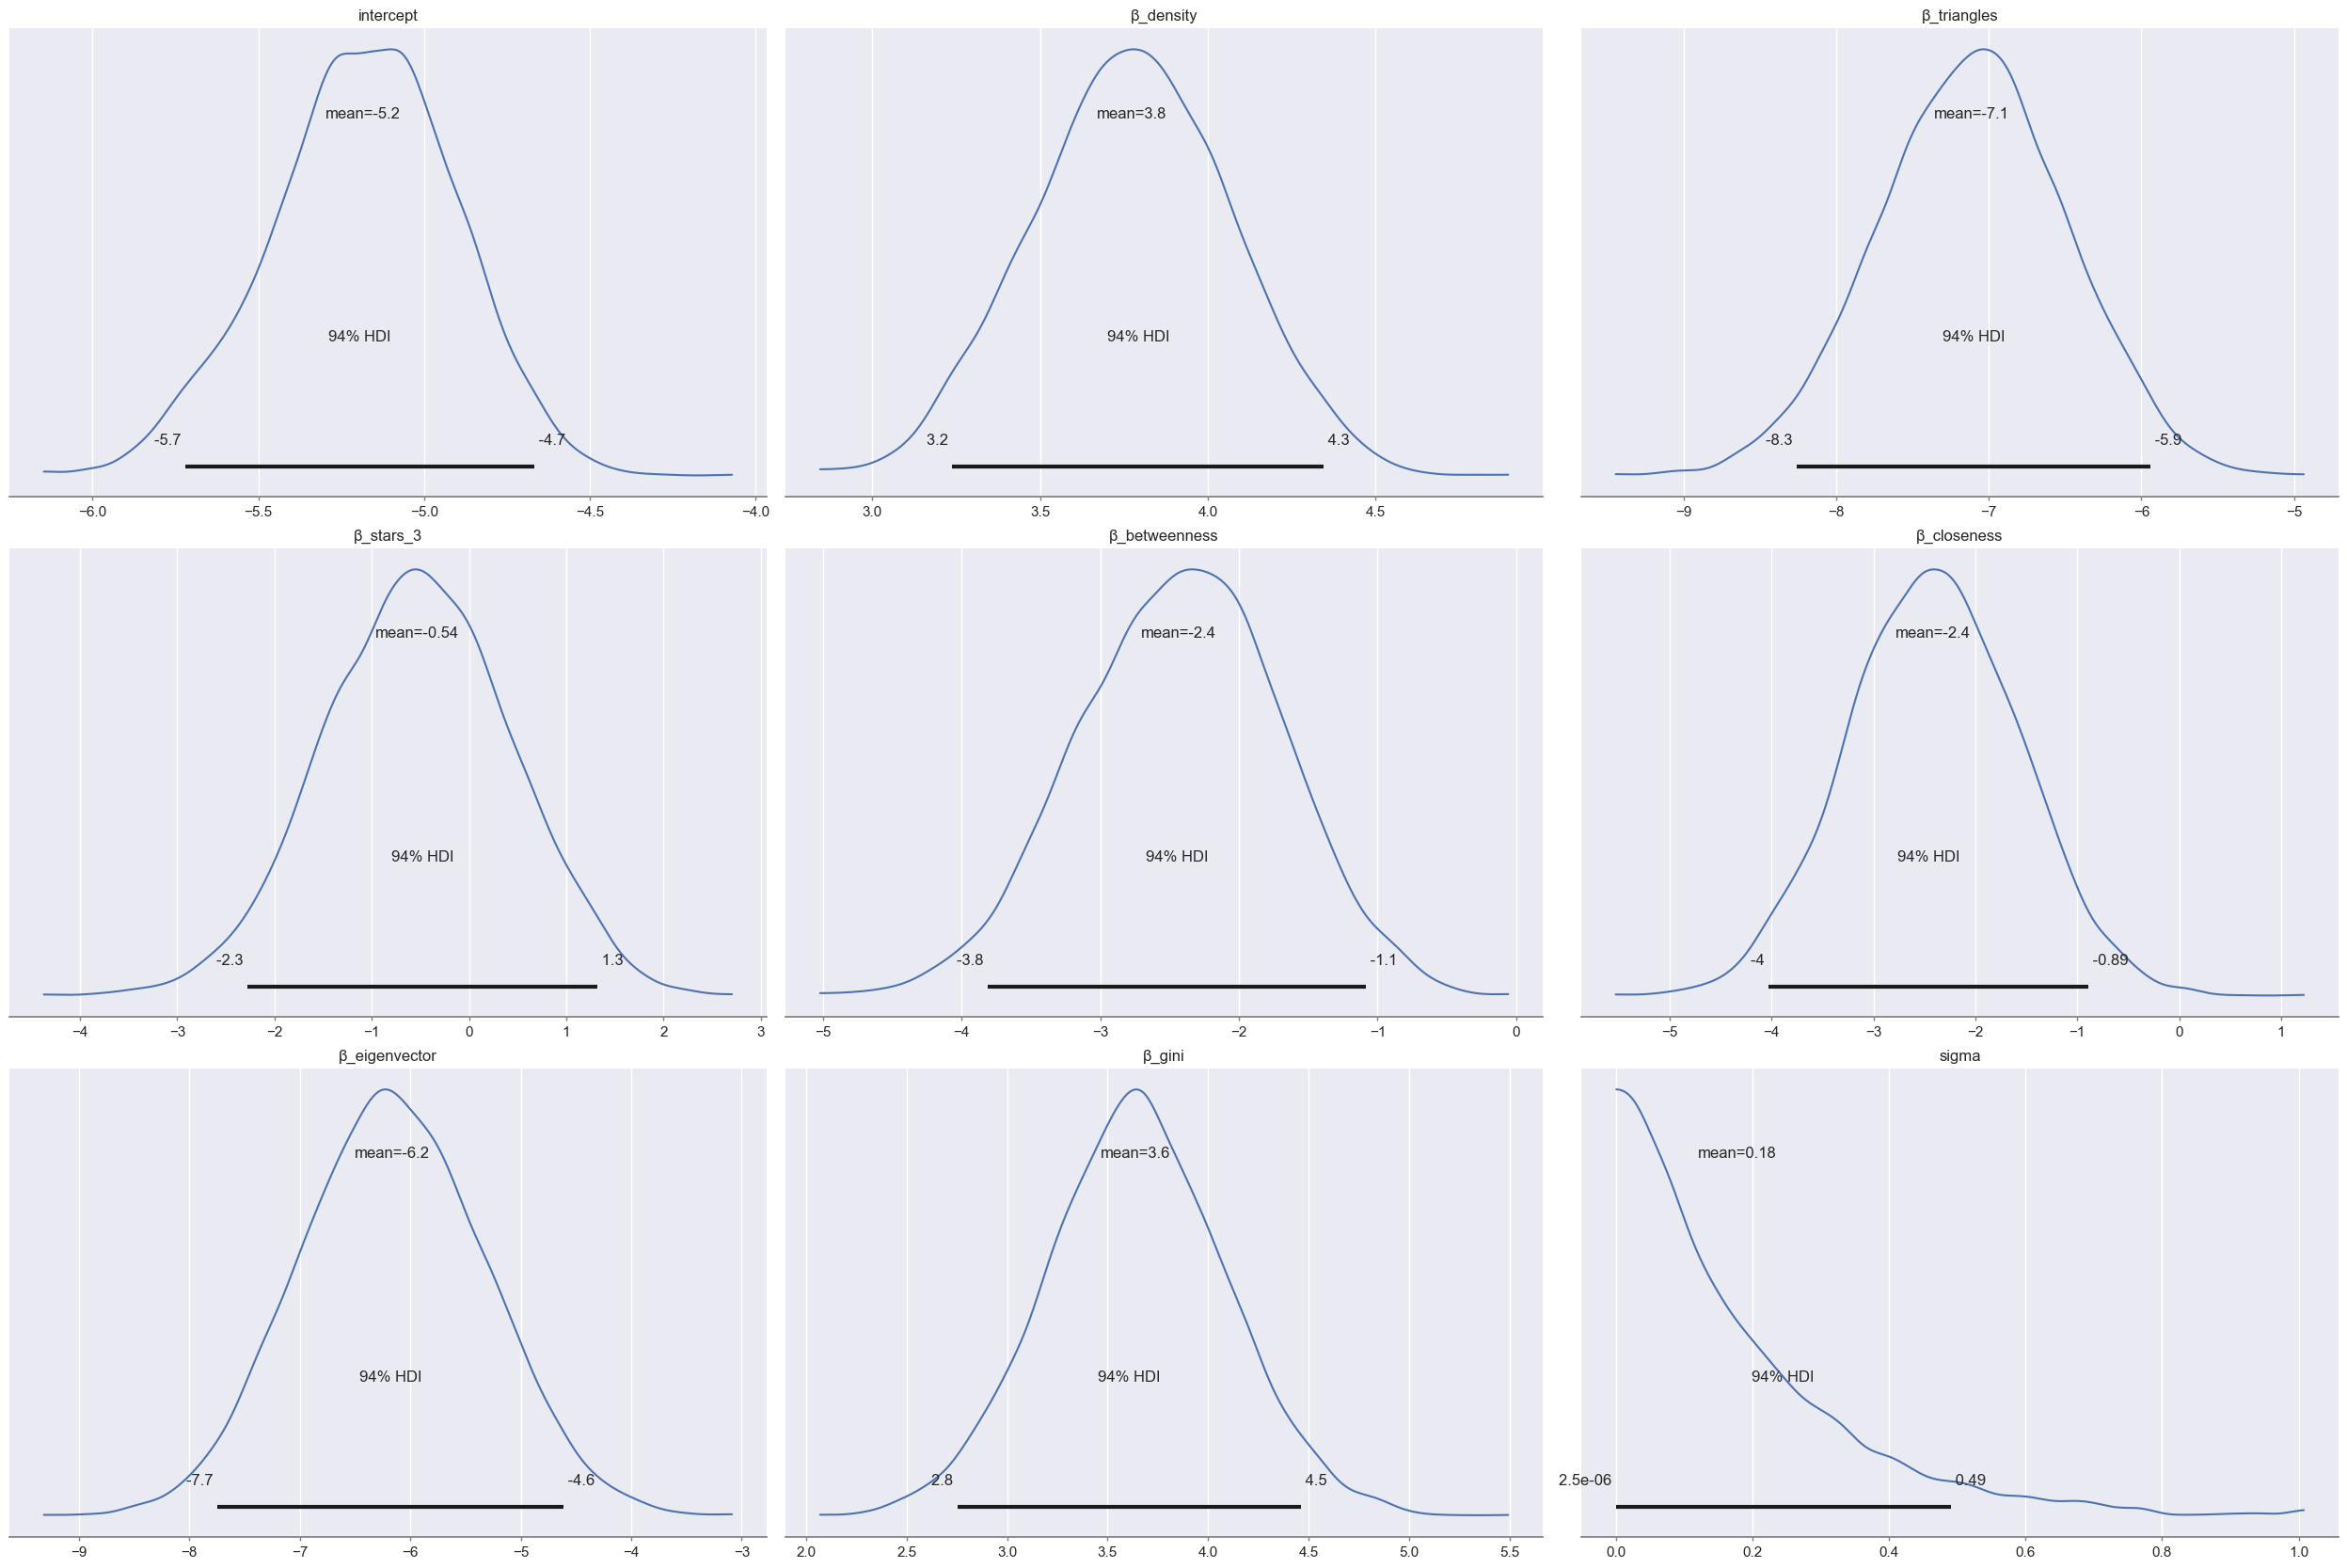

In [ ]:
az.plot_posterior(trace)
plt.show()

In [17]:
# Goodness of fit
# The observed data looks like draws from the posterior distribution

with model:
    ppc = pm.sample_posterior_predictive(trace)

<AxesSubplot:xlabel='logit / logit'>

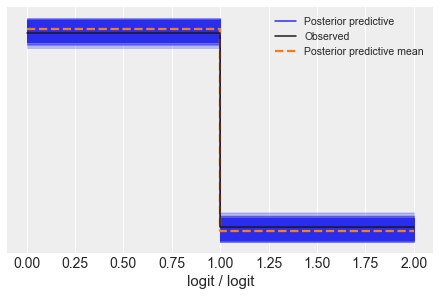

In [18]:
az.plot_ppc(ppc)
plt.show()

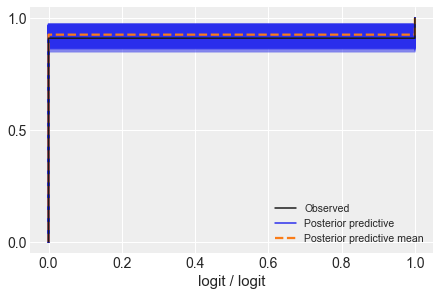

In [20]:
az.plot_ppc(ppc, kind='cumulative')
plt.show()

In [33]:
inference_data = az.convert_to_inference_data(trace)
inference_data

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [32]:
pooled_loo = az.loo(inference_data)

pooled_loo

TypeError: log likelihood not found in inference data object

In [83]:
pm.logp(β_density, 1)

Check{sigma > 0}.0

In [84]:
pm.draw(β_density, 10)

array([-17.52590881,   8.22708905, -26.82383099,  -0.27403854,
        17.83559134, -16.82382247,  -4.37604248,   7.40462538,
       -18.32060434,  -0.77272666])